### Download dataset
- Download the dataset from here https://www.kaggle.com/datasets/imneonizer/normal-vs-camouflage-clothes
- Make sure you are logged in

In [ ]:
!apt update -y && apt install -y tree

In [8]:
!tree dataset --filelimit=10

dataset
├── camouflage [7949 entries exceeds filelimit, not opening dir]
└── normal [7949 entries exceeds filelimit, not opening dir]

2 directories, 0 files


In [17]:
!tree dataset/camouflage | head -5
!tree dataset/normal | head -5

dataset/camouflage
├── 0000.jpg
├── 0001.jpg
├── 00010.jpg
├── 0001000.jpg
dataset/normal
├── 0000.jpg
├── 0001.jpg
├── 00010.jpg
├── 000100.jpg


In [3]:
# Split the dataset to train/val splits
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the dataset directory and split ratio
dataset_dir = 'dataset'
train_ratio = 0.8

# Define the train and validation directories
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Create train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each category (camouflage, normal)
for category in ['camouflage', 'normal']:
    category_dir = os.path.join(dataset_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    # Create category subdirectories in train and validation directories
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)

    # Get a list of images in the current category directory
    images = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]

    # Split the images into train and validation sets
    train_images, val_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Move the train images to the train directory
    for image in train_images:
        source = os.path.join(category_dir, image)
        destination = os.path.join(train_category_dir, image)
        shutil.move(source, destination)

    # Move the validation images to the validation directory
    for image in val_images:
        source = os.path.join(category_dir, image)
        destination = os.path.join(val_category_dir, image)
        shutil.move(source, destination)

In [5]:
!tree dataset --filelimit=10

dataset
├── train
│   ├── camouflage [6359 entries exceeds filelimit, not opening dir]
│   └── normal [6359 entries exceeds filelimit, not opening dir]
└── val
    ├── camouflage [1590 entries exceeds filelimit, not opening dir]
    └── normal [1590 entries exceeds filelimit, not opening dir]

6 directories, 0 files


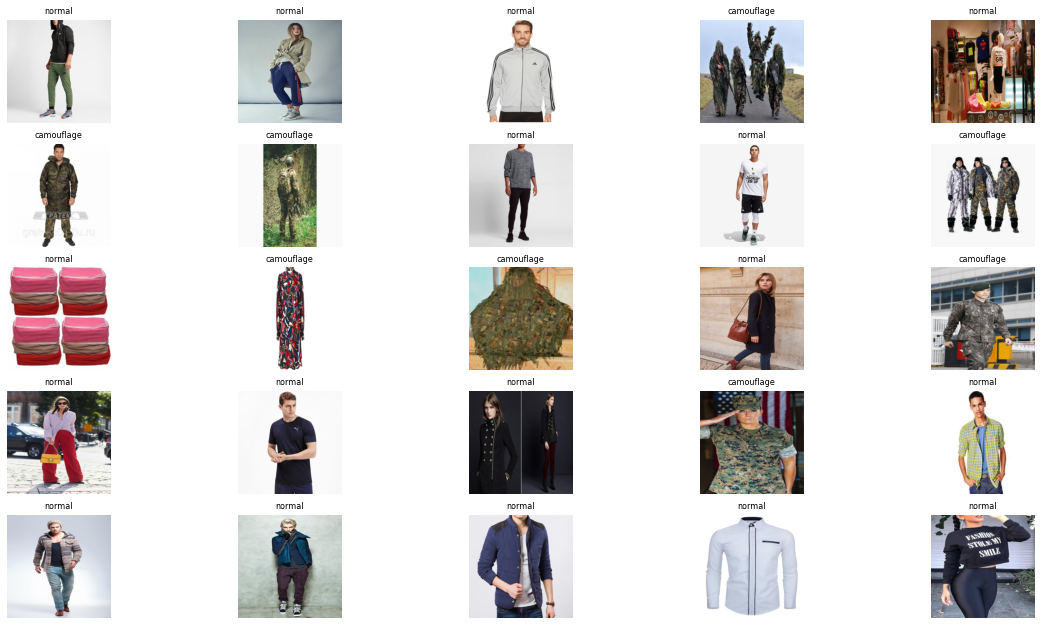

In [4]:
import cv2
import matplotlib.pyplot as plt
import os, glob
import numpy as np
from PIL import Image

IMAGE_SIZE = 224
images = glob.glob("./dataset/*/*/*")

plt.figure(figsize = (20,11))
for i, idx in enumerate(np.random.choice(len(images), size=25, replace=False)):
    path = images[idx]
    label = os.path.basename(os.path.dirname(path))
    image = np.array(Image.open(path).resize((IMAGE_SIZE, IMAGE_SIZE)))
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(f"{label}", fontdict = {'fontsize' : 8})
    plt.axis("off")